# Elevator System
- The elevator system is designed to efficiently transport people between floors in a building. The system needs to handle multiple requests, optimize elevator movement, and ensure safety. The system shoulw be able to accommodate different priorities, handle emergency situations, and provide a smooth user experience.

## Rules of the System
- Setup:
    - The building has multiple floors and can have multiple elevators.
    - Elevators can be called from any floor and can travel to any floor.
    - Each elevator has a miximum capacity and weight limit.
    - The system schedules elevator moveemnt based on requests and optimizes for efficiency.
- Operation:
    - Users can request an elevator from any floor by pressing up/down buttons.
    - Inside the elevator, users can select destination floors. (There is one more type, where users can choose destination floors outside only, but we are not covering those here!!)
    - The system prioritizes and schedules these requests efficiently.
    - Elevator have indicators showing current floor and direction.
- Safety Features
    - Emergency stop functionality must be available.
    - Overload detection prevents elevator movement if capacity is exceeded.
    - Door sensors prevent doors from closing if obstructed.

## Interview Settings
### Point 1: Intro and Vague Problem statement
- Interviewer: Let's start with a basic problem statement. Design an Elevator system.
- Candidate: Here's my understnading of the Elevator system:
    - The system will manage multiple elevators withing a building
    - Users can request elevators from different floors.
    - The system optimizes elevator assignments to minimize wait times.
    - Safety features must be implemented to handle emergencies.
    - The system should be scalable to handle buildings of diffent sizes.
- Interviewer: We are aligned with the flow. Please continue ahead.
- Candidate: Before diving into the design, I'd like to clarify a few requirements.
    - How many elevators should the system support?
    - Are there special considerations like express elevators or service elevators.
    - How should the system optimize elevator assignment?

### Point 2: Clarifying Requirements:
- Interviewer: We want a system that:
    - Supports multiple elevators in a building with any number of floors.
    - Handles both external requests (from floors) and internal requests (from insize elevators)
    - Efficiently scheduled elevators movement to minimze wait time.
- Candidate: To summarize, the key requirements are:
    - A building with multiple floors and elevators
    - External and internal request handling
    - Intelligent scheduling algorithm for elevator assignment.
    - Ability to handle edge cases like power outage or maintenance.

### Point 3: Identifying key components:
- Candidate: Now that we have the requirements, let's identify the key components of our Elevator system:
    1. Elevator: Represents individual elevators cars
    2. Building: Contains floors and elevators
    3. Floor: Contains a single floor
    4. ElevatorController: Manages elevator operations and scheduling
    5. State management with Enums

In [2]:
from enum import Enum

class ElevatorState:
    MOVING = "MOVING"
    IDLE = "IDLE"
    STOPPED = 'STOPPED'
    MAINTENANCE = 'MAINTENANCE'

class Direction: 
    UP = 'UP'
    DOWN = 'DOWN'
    IDLE = 'IDLE'

In [ ]:
from collections import deque

class Elevator:
    self.id: int  # Unique identifier for the elevator
    self.currentFloor: int # The floor where the elevator is currently located
    self.direction: Direction # The current direction of the elevator (UP, DOWN, ILE)
    self.state: ElevatorState # The current operational state of the elevator (MOVING, IDLE, STOPPED, MAINTENANCE)
    self.observers: list(ElevatorObservers) # A list of observers (listeners) that monitor the elevator's status
    self.requests: deque(ElevatorRequest) # A simple queue to mamage floor requests in the order they are received.

    def getId(self):
        return self.id

    def getCurrentFloor(self):
        return self.currentFloor

    def getDirection(self):
        return self.state

    def getState(self):
        return self.state

    def getRequestQueue(self):
        return deque(self.requests)
    
    def getDestinationFloors(self):
        return list(self.requests)
    

In [ ]:
class Building:
    self.name: str
    self.numOfFloors: int
    self.elevatorController: ElevatorController

In [3]:
class Floor:
    def __init__(self, floorNumber):
        self.floorNumber = floorNumber

    def getFloorNumber(self):
        return self.floorNumber

In [ ]:
class ElevatorController:
    self.elevators: list(Elevator)
    self.floors: list(Floor)
    self.schedulingStrategy: SchedulingStrategy
    self.currentElevatorId: int

### Point 4: Design Patterns
- Candidate: The key challeges for Elevator system include:
    - Efficient Scheduling Algorithm: Minimizing wait times and optimizing elevator assignments
    - Handling Concurrent Requests: Managing multiples simultaneous requests (can be ignored also)
    - Fault Tolerance: Ensuring system functionality if an elevator fails (Edge case)
    - Load Balancing: Distributing requests across multiple elevators.
    - Handling emergency stops, power outages, and maintenance modes (Edge cases)
### Point 5: Approach
- Interviewer: How would we approach these challenges?
- Candidate: I propsoe using design patterns effectively.
    1. Observer Pattern for Event Hanling
        - Notifies system components of state changes.
        - Enables real-time updates for display panels and monitoring systems
    2. Command Pattern for Request Processing
        - Encapsulating each request as an object
        - Allows for requests queuing, prioritization, and cancellation.
    3. Strategy Pattern for Scheduling Algorithms
        - Enables different scheduling strategies
        - Can switch between algorithms based on time of day or building needs.
- 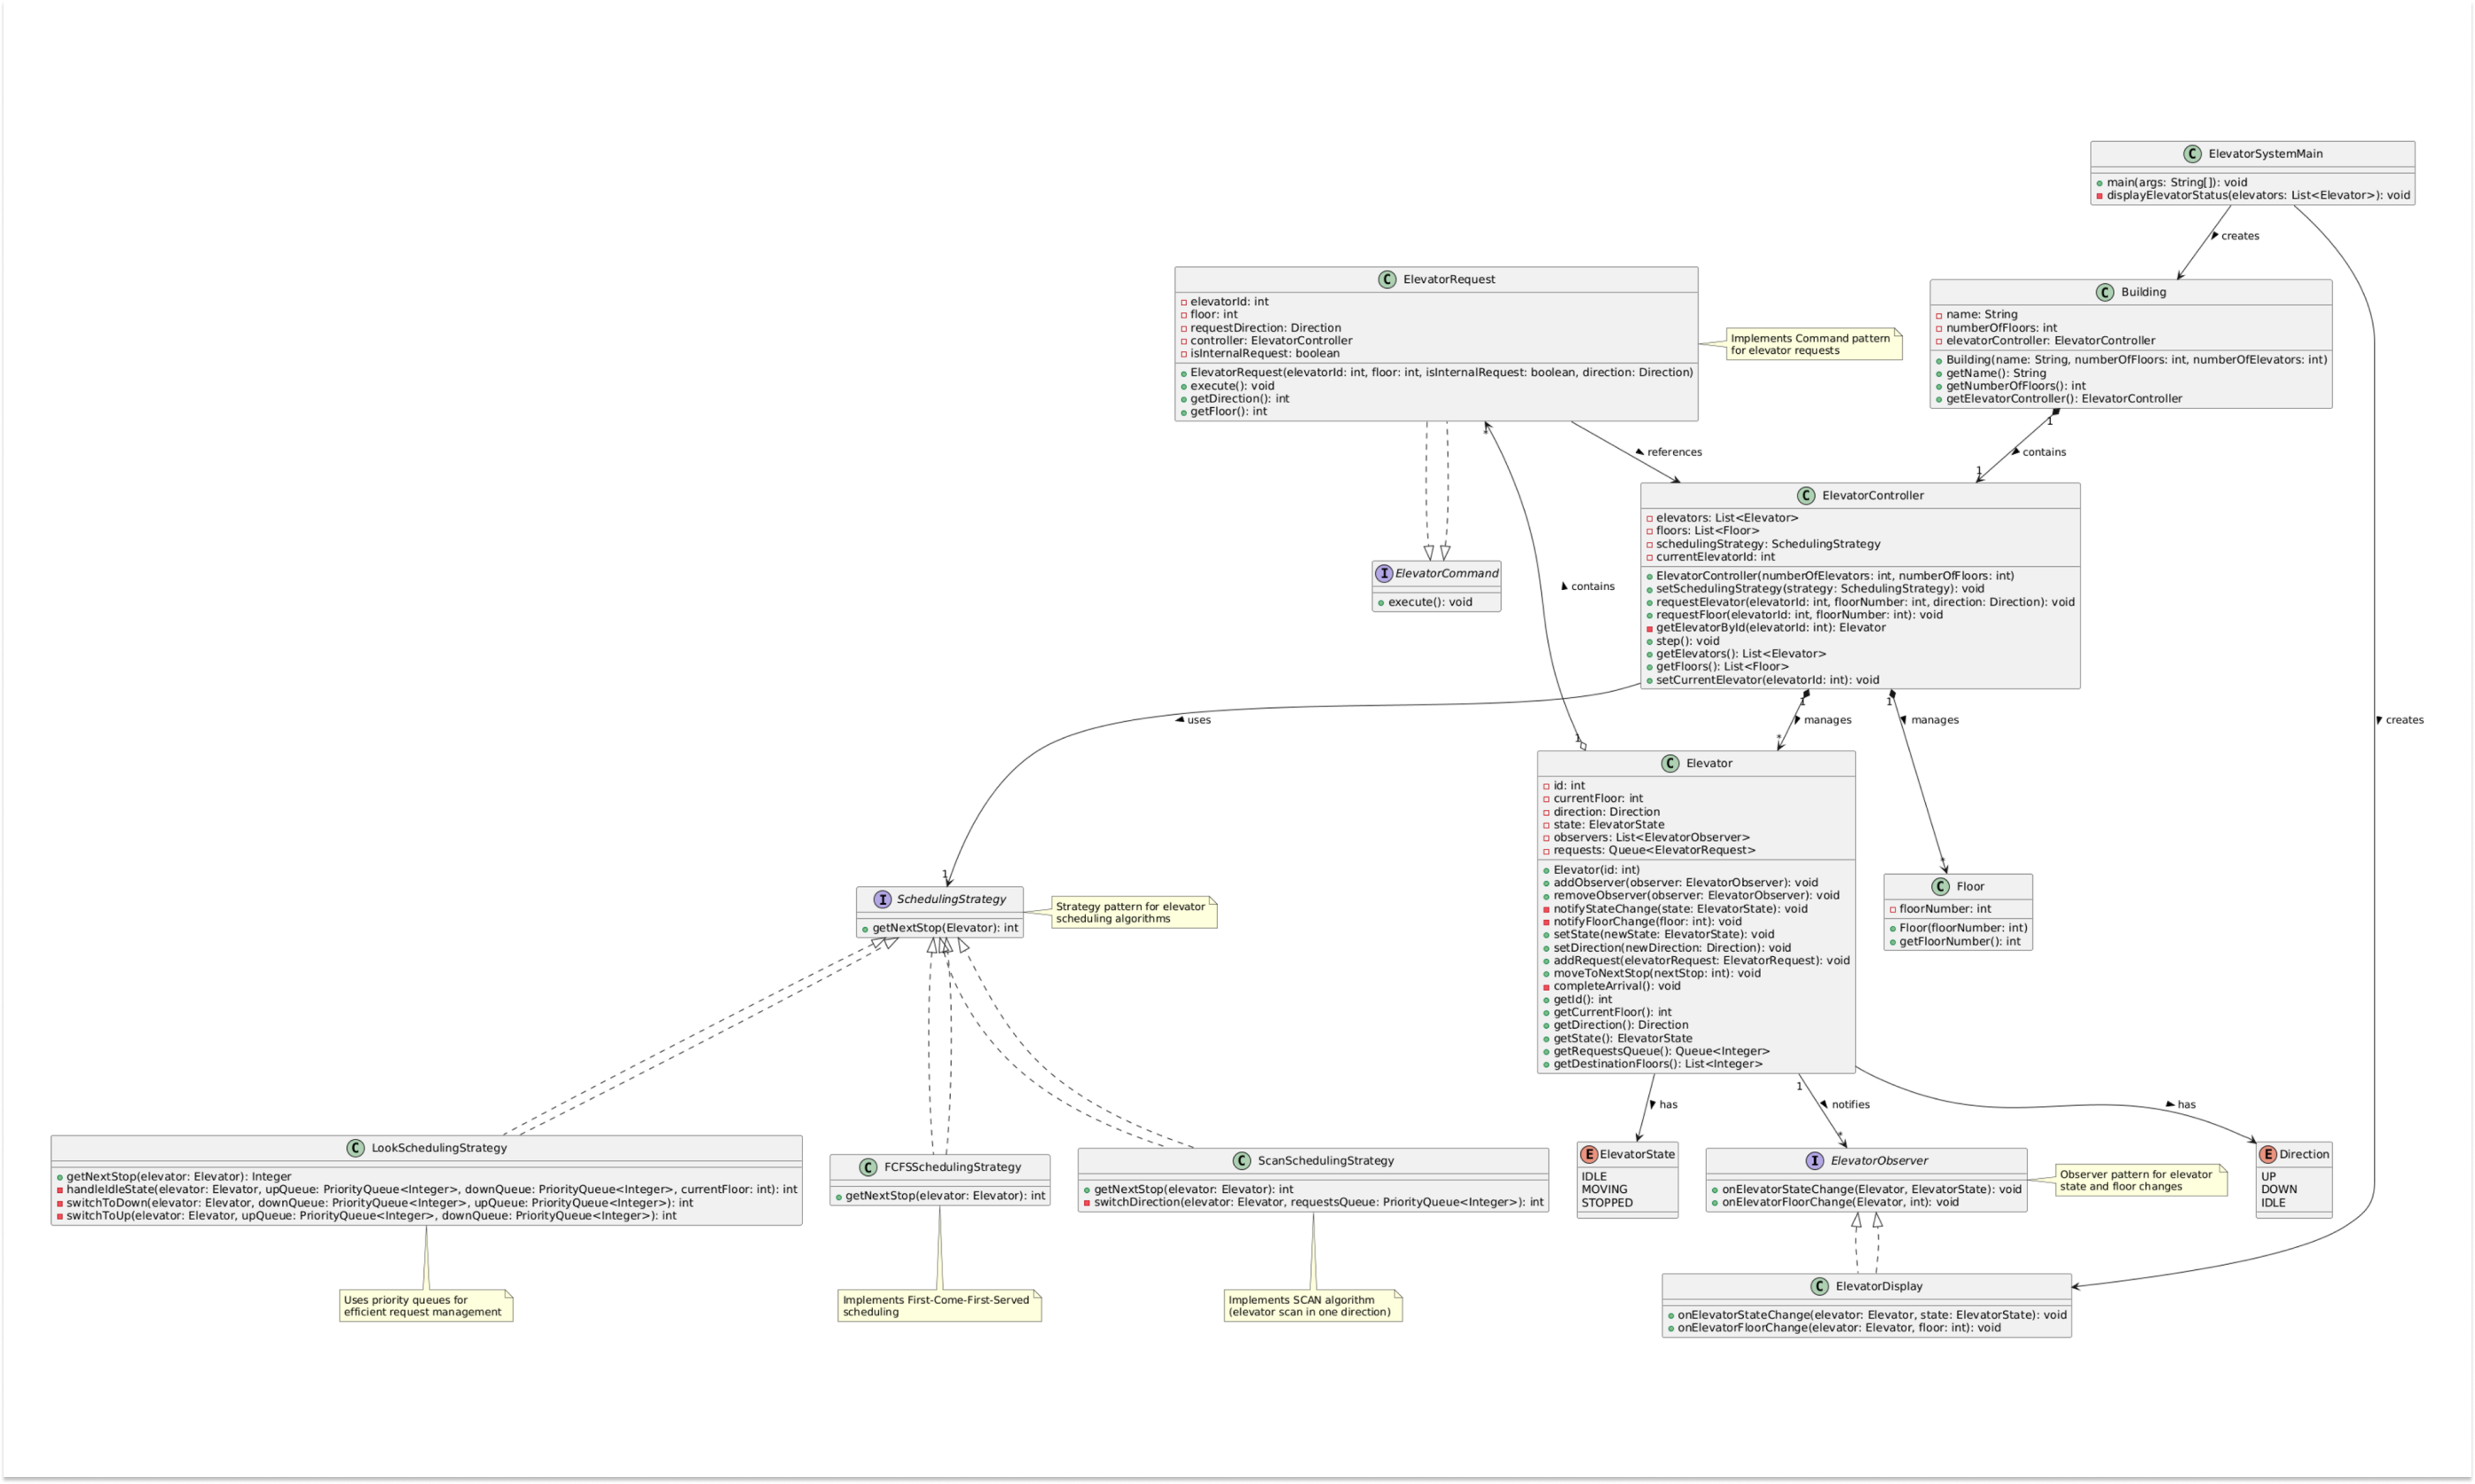

#### Observer Pattern for Event Handling

In [ ]:
from abc import ABC, abstractmethod

class ElevatorObserver(ABC):
    @abstractmethod
    def onElevatorStateChange(self, elevator: Elevator, state: ElevatorState):
        pass

    @abstractmethod
    def offElevatorFloorChange(self, elevator: Elevator, floor: int):
        pass


class ElevatorDisplay(ElevatorObserver):
    def onElevatorStateChange(self, elevator: Elevator, state: ElevatorState):
        # Dispaly the new state of the elevator
        print(f'Elevator {elevator.getId()} state changed to {state}')

    def offElevatorFloorChange(self,  elevator: Elevator, floor: int):
        # Display the elevator's movement to a new floor
        print(f"Elevator {elevator.getId()} moved to floor {floor}")

#### Command Pattern for Request Processing

In [ ]:
class ElevatorCommand(ABC):
    @abstractmethod
    def execute(self):
        pass

class ElevatorRequest(ElevatorCommand):
    def __init__(self, elevatorId: int, floor: int, isInternalRequest: bool, direction: Direction):
        self.elevatorId = elevatorId
        self.floor = floor
        self.isInternalRequest = isInternalRequest
        self.direction = direction
        self.controller = ElevatorController()

    def execute(self):
        if self.isInternalRequest:
            controller.requestFloor(self.elevatorId, self.floor)
        else:
            controller.requestElevator()